In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('adult.csv')

In [78]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [79]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [80]:
df.age.value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [81]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [82]:
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis = 1)

In [83]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [14]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [15]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [16]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

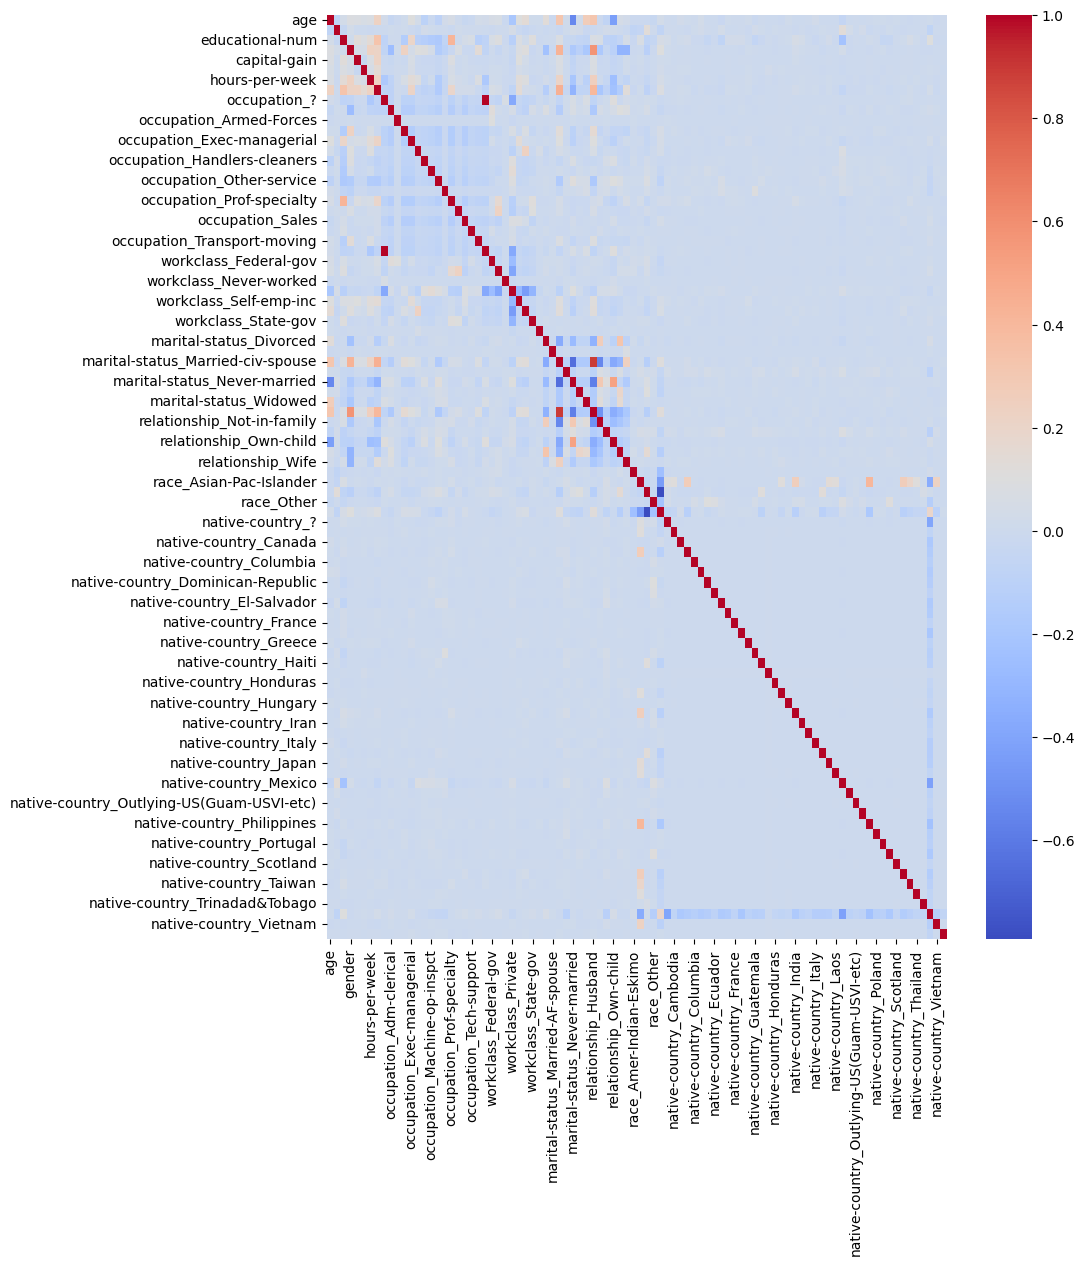

In [18]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [19]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [20]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

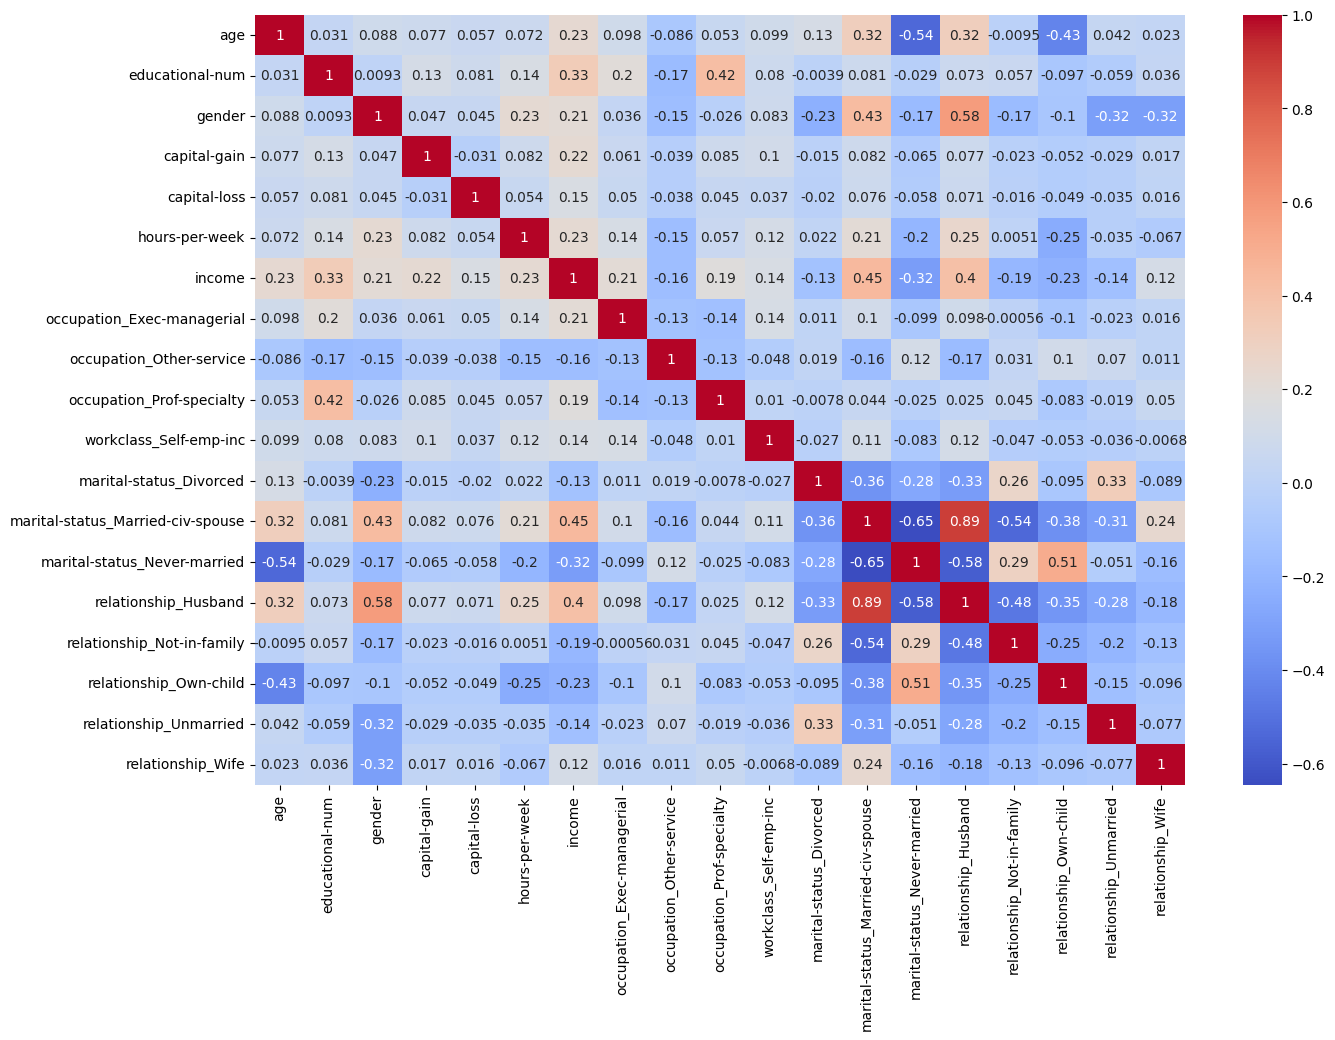

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis = 1)

In [23]:
train_df, test_df = train_test_split(df, test_size = 0.2)

In [24]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28586,30,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28638,30,9,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22088,17,8,1,0,0,18,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6184,48,12,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
30002,31,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31686,49,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25166,47,14,1,0,0,38,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14791,71,9,1,0,1816,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
46476,31,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
37186,25,13,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
34420,44,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5114,31,10,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19231,27,13,1,0,0,42,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
27083,52,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45912,31,15,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9168,23,10,1,0,0,20,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16630,31,13,1,0,0,25,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37938,69,10,1,9386,0,72,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
train_x = train_df.drop('income', axis = 1)
train_y = train_df['income']

test_x = test_df.drop('income', axis = 1)
test_y = test_df['income']

In [27]:
forest = RandomForestClassifier()
forest.fit(train_x, train_y)

RandomForestClassifier()

In [28]:
forest.score(test_x, test_y)

0.8507523799774798

In [29]:
forest.feature_importances_

array([2.29028822e-01, 1.30750663e-01, 1.37071509e-02, 1.04902005e-01,
       3.77813363e-02, 1.14292894e-01, 1.74980504e-03, 4.97481631e-03,
       4.76907765e-05, 6.01451668e-03, 1.95523472e-02, 4.57271521e-03,
       3.64945966e-03, 4.32357627e-03, 8.23002199e-03, 2.19410495e-04,
       1.75760734e-02, 2.63431479e-03, 6.16008134e-03, 4.54880018e-03,
       4.18590431e-03, 1.66163442e-03, 4.95113853e-03, 5.39519163e-03,
       1.61336770e-06, 9.36867963e-03, 5.96762129e-03, 8.14069680e-03,
       4.25006490e-03, 1.23087943e-04, 8.08802423e-03, 3.55341550e-04,
       7.05911458e-02, 1.07557109e-03, 2.92502469e-02, 2.22779098e-03,
       1.73771321e-03, 4.79365743e-02, 1.15371526e-02, 1.70006163e-03,
       7.39063148e-03, 5.51620323e-03, 1.01204118e-02, 1.33448487e-03,
       3.07246945e-03, 4.79856633e-03, 9.06747329e-04, 6.20313213e-03,
       2.74811243e-03, 3.18676569e-04, 1.47953439e-03, 5.96602190e-04,
       2.64273122e-04, 8.36944824e-04, 2.85007311e-04, 1.21992590e-04,
      

In [30]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [31]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse=True)}

In [32]:
importances

{'age': np.float64(0.2290288215807432),
 'educational-num': np.float64(0.13075066276099304),
 'hours-per-week': np.float64(0.11429289390582298),
 'capital-gain': np.float64(0.10490200546529352),
 'marital-status_Married-civ-spouse': np.float64(0.07059114576190746),
 'relationship_Husband': np.float64(0.047936574276604096),
 'capital-loss': np.float64(0.03778133632298836),
 'marital-status_Never-married': np.float64(0.029250246902904672),
 'occupation_Exec-managerial': np.float64(0.019552347199037735),
 'occupation_Prof-specialty': np.float64(0.01757607344837122),
 'gender': np.float64(0.013707150910056897),
 'relationship_Not-in-family': np.float64(0.011537152555523369),
 'relationship_Wife': np.float64(0.010120411807001899),
 'workclass_Private': np.float64(0.009368679633472278),
 'occupation_Other-service': np.float64(0.008230021994453933),
 'workclass_Self-emp-not-inc': np.float64(0.008140696800026848),
 'marital-status_Divorced': np.float64(0.008088024232708128),
 'relationship_Own

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid=param_grid, verbose=10)

In [34]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [35]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=50)

In [36]:
final = grid_search.best_estimator_
final.score(test_x, test_y)

0.8686661889650936

In [37]:
importances = dict(zip(final.feature_names_in_, final.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse=True)}

In [38]:
importances

{'capital-gain': np.float64(0.1416957743359742),
 'educational-num': np.float64(0.14043062564430836),
 'marital-status_Married-civ-spouse': np.float64(0.11550828290202313),
 'age': np.float64(0.10443199012047767),
 'relationship_Husband': np.float64(0.09062453373673864),
 'hours-per-week': np.float64(0.06551974989967149),
 'capital-loss': np.float64(0.046612060195873044),
 'marital-status_Never-married': np.float64(0.03211354145254891),
 'occupation_Exec-managerial': np.float64(0.02935237793023906),
 'occupation_Prof-specialty': np.float64(0.025080354963647845),
 'gender': np.float64(0.018050528353506255),
 'relationship_Not-in-family': np.float64(0.016538205250654726),
 'relationship_Own-child': np.float64(0.014423811878284822),
 'relationship_Wife': np.float64(0.014222597414339806),
 'relationship_Unmarried': np.float64(0.010375478030326872),
 'occupation_Other-service': np.float64(0.010002280307063294),
 'marital-status_Divorced': np.float64(0.00933733367728216),
 'workclass_Self-em